<a href="https://colab.research.google.com/github/Nur9702/15-dars/blob/main/19_UNSUPERVISED_LEARNING_CLUSTERING_19_8_YAKUNIY_AMALIY_VAZIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**19-modul. Unsupervised learning. Clustering**
# 19.8. Modul boʻyicha yakuniy amaliy vazifa. Mijozlarni xarajat turlariga qarab segmentlash

**Ushbu vazifa orqali siz:**

✔️ klasterlash;

✔️ maʼlumotlarni normallashtirish;

✔️ klaster tahlili;

✔️ vizualizatsiya kabi real data sayns loyihalari uchun zarur texnik ko‘nikmalarga ega bo‘lasiz.

## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  
- **Hajmi:** **22 KB**
- **Format:** CSV  
- **Tavsif:** bu dataset **ulgurji savdo mijozlarini** xarajatlar bo‘yicha klasterlash uchun ishlatiladi.  
  U quyidagi xarajat kategoriyalarini o‘z ichiga oladi:  
  - **channel** (mijoz turi: 1 – HoReCa (mehmonxona, restoran, kafelar) yoki 2 – chakana savdo)  
  - **region** (hudud: 1 – Lisbon, 2 – Oporto, 3 – boshqa)  
  - **fresh** (yangi mahsulotlarga sarf qilingan summa)  
  - **milk** (sut mahsulotlariga sarf qilingan summa)  
  - **grocery** (oziq-ovqat mahsulotlariga sarf qilingan summa)  
  - **frozen** (muzlatilgan mahsulotlarga sarf qilingan summa)  
  - **Detergents_Paper** (kimyoviy tozalash va qog‘oz mahsulotlari)  
  - **delicassen** (delikates mahsulotlar)  

---

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.

---

###*** ESLATMA**: *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#javobni shu yerda yozing.


In [3]:
df = df.drop(['Channel', 'Region'], axis=1)
display(df.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
display(df_scaled.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10) # You can change n_clusters
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters
display(df.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2


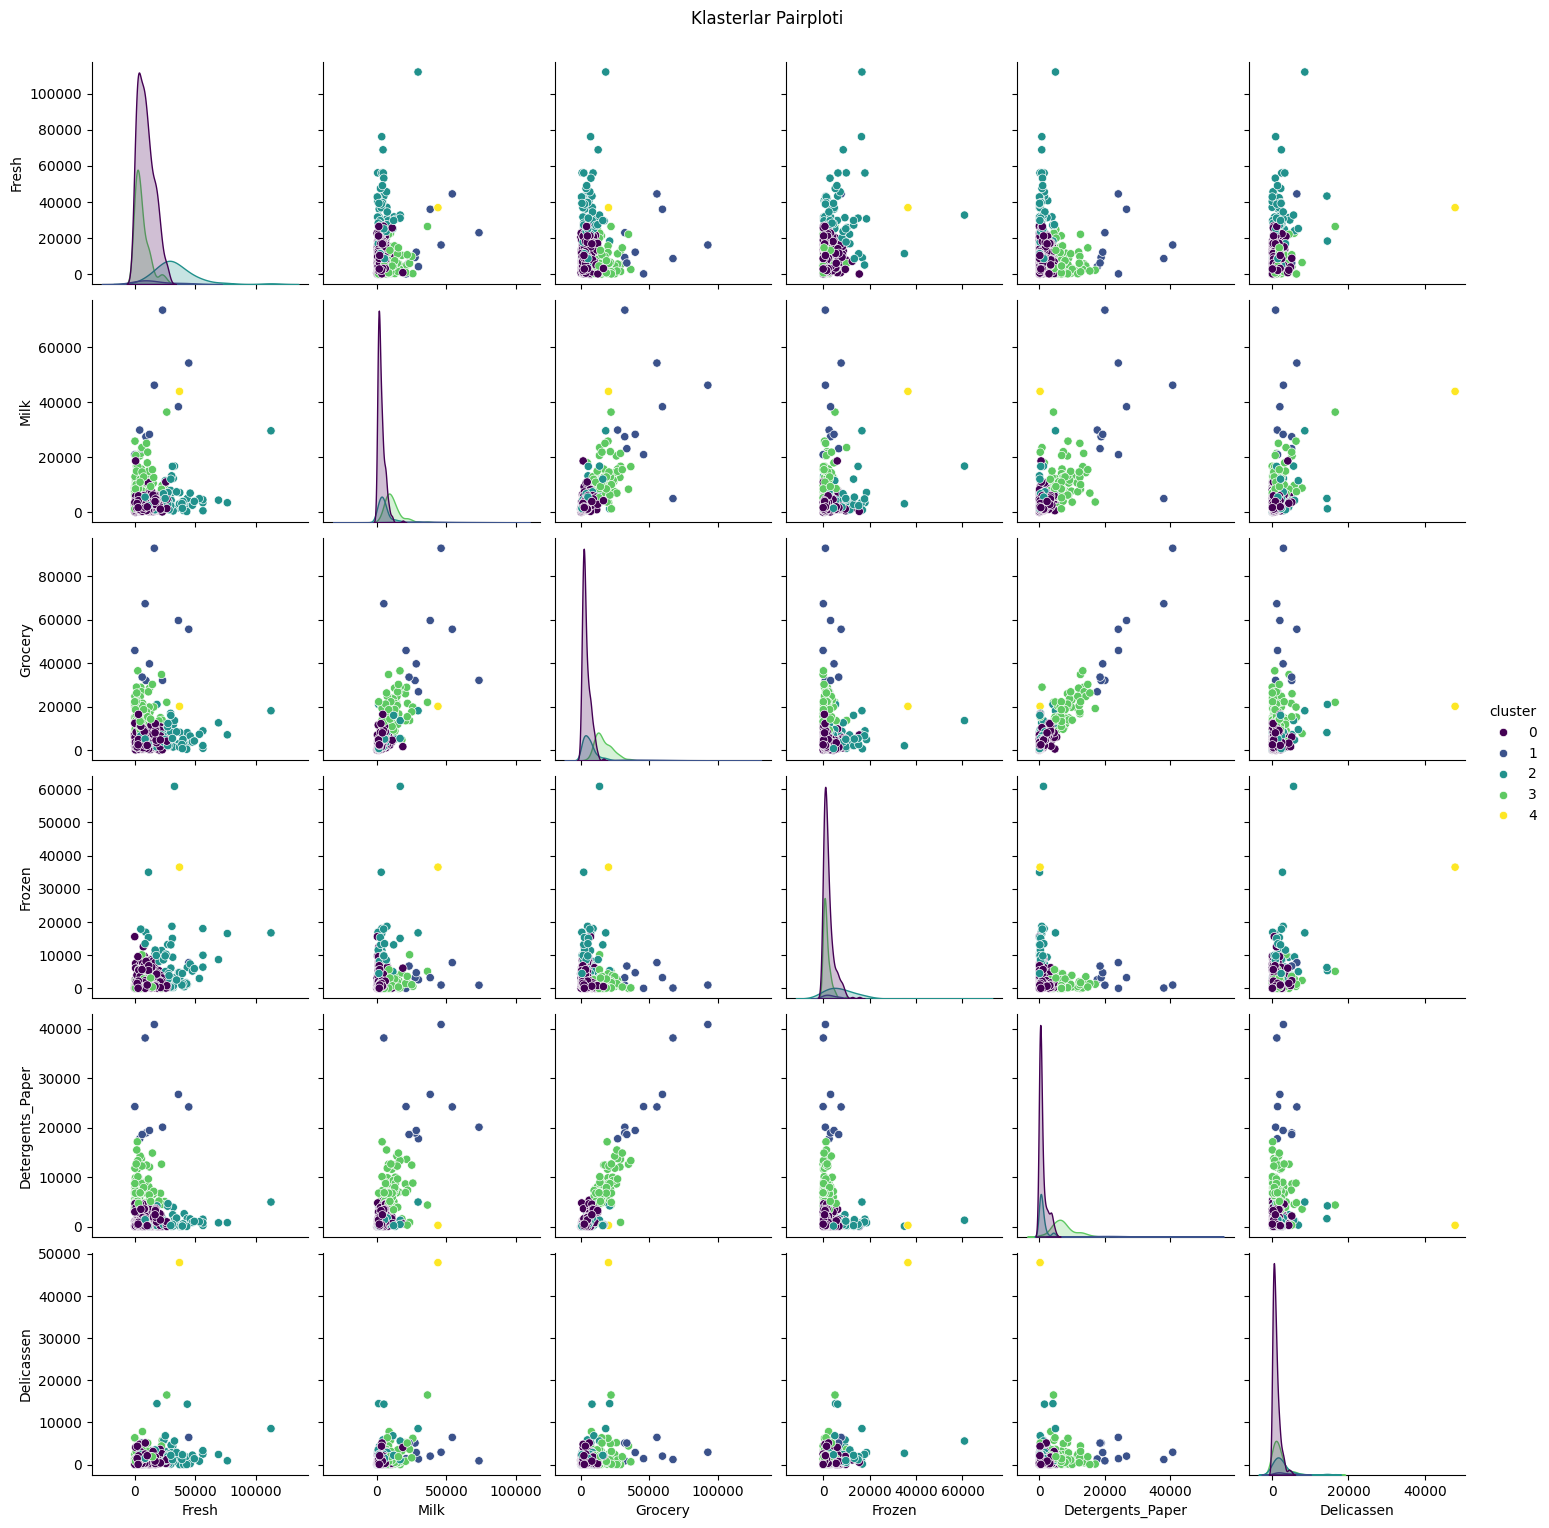

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='cluster', palette='viridis')
plt.suptitle('Klasterlar Pairploti', y=1.02)
plt.show()

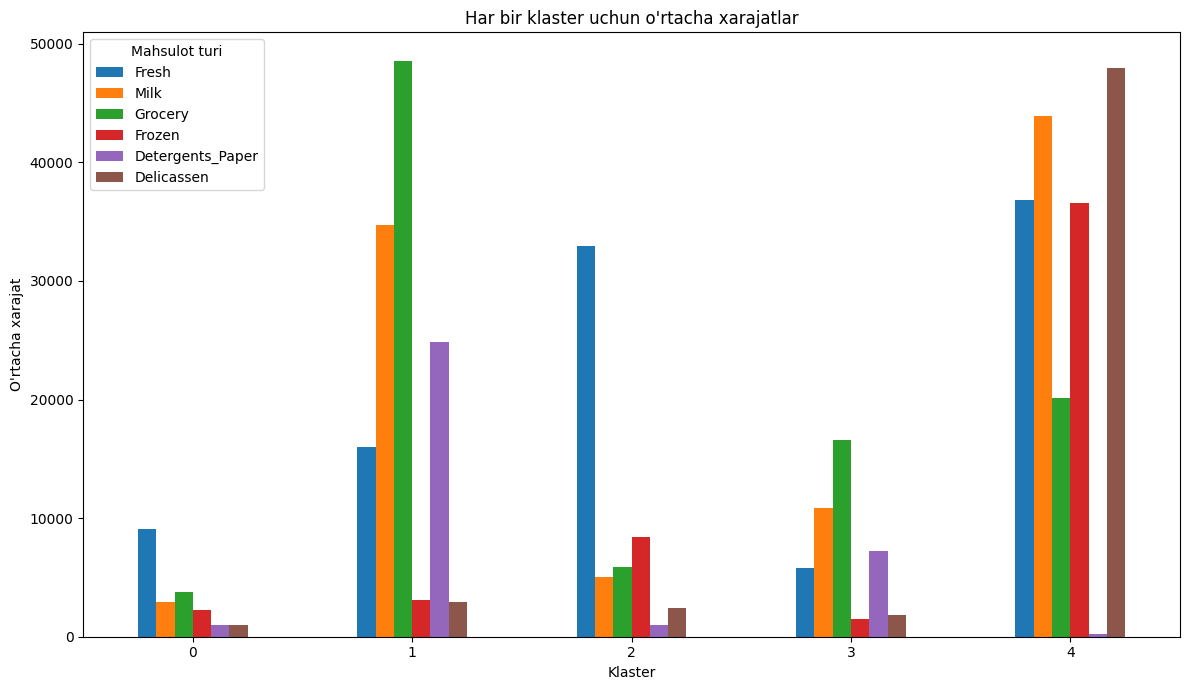

In [10]:
import matplotlib.pyplot as plt

cluster_means = df.groupby('cluster').mean()
cluster_means.plot(kind='bar', figsize=(12, 7))
plt.title('Har bir klaster uchun o\'rtacha xarajatlar')
plt.xlabel('Klaster')
plt.ylabel('O\'rtacha xarajat')
plt.xticks(rotation=0)
plt.legend(title='Mahsulot turi')
plt.tight_layout()
plt.show()